In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

In [7]:
dataset = pd.read_csv('AAPL55_Train.csv')
trainset = pd.read_csv('AAPL55_Test.csv')

In [8]:
dataset.shape

(1640, 7)

In [9]:
dataset.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,9.442500,9.082143,9.432858,9.148929,1.133345e+09,7.828238
1,2010-06-30,9.213214,8.928928,9.168214,8.983214,7.394520e+08,7.686444
2,2010-07-01,9.100000,8.686429,9.082143,8.874286,1.022896e+09,7.593241
3,2010-07-02,8.961785,8.685715,8.946072,8.819285,6.938428e+08,7.546182
4,2010-07-06,9.028571,8.791429,8.964286,8.879642,6.152356e+08,7.597826


In [9]:
dataset.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1640.000000,1640.000000,1640.000000,1640.000000,1.640000e+03,1640.000000
mean,20.900022,20.512600,20.714997,20.708834,3.541431e+08,18.477150
std,6.626287,6.518764,6.575025,6.572505,2.222061e+08,6.310272
min,8.664643,8.412857,8.501429,8.568929,4.590360e+07,7.331965
25%,15.180804,14.959375,15.060625,15.044375,1.881847e+08,13.003341
50%,20.608214,20.311428,20.505357,20.431965,3.023328e+08,17.721854
75%,26.826250,26.304375,26.586874,26.501875,4.511206e+08,24.428666
max,33.634998,32.849998,33.615002,33.250000,1.880998e+09,30.182924


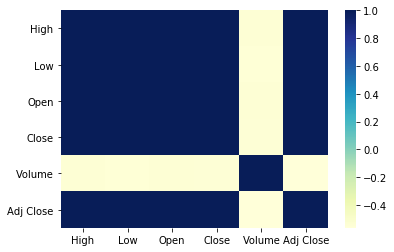

In [18]:
sb.heatmap(dataset.corr(), cmap="YlGnBu");

## Columns 'High','Low','Open','Volume','Adj Close'

In [19]:
X = preprocessing.scale(dataset[['High','Low','Close','Volume','Adj Close']].values)
y = preprocessing.scale(dataset['Open'].values)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
## Lets get to know our split data

print(f'X_train: \t{X_train.shape}')
print(f'X_test: \t{X_test.shape}')
print(f'y_train: \t{y_train.shape}')
print(f'y_test: \t{y_test.shape}')

X_train: 	(1312, 5)
X_test: 	(328, 5)
y_train: 	(1312,)
y_test: 	(328,)


In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

In [22]:
k_best = SelectKBest(score_func=mutual_info_regression, k='all')
k_best.fit(X,y)
X_train_kbest = k_best.transform(X_train)
X_train_kbest = k_best.transform(X_test)

Feature 0: 3.766288
Feature 1: 3.674360
Feature 2: 3.143239
Feature 3: 0.425521
Feature 4: 2.919681


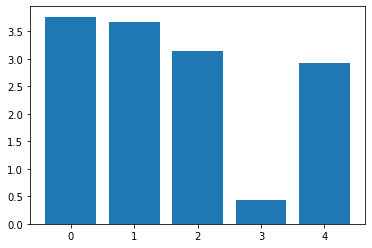

In [23]:
for i in range(len(k_best.scores_)):
    print('Feature %d: %f' % (i, k_best.scores_[i]))
plt.bar([i for i in range(len(k_best.scores_))], k_best.scores_)
plt.show()

## Almost no difference between 'High' and 'Low' as best features. Pick 'High'

In [24]:
x = preprocessing.scale(dataset[['High']].values)
#x = dataset[['High','Low','Open','Volume']].values
y = preprocessing.scale(dataset['Open'].values)
regressor = LinearRegression()

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print('Is data split?:', len(x_train) + len(x_test) == dataset.shape[0])

Is data split?: True


In [27]:
print(f'Regressor Intercept: {regressor.intercept_}')
print(f'Regressor Coefficients: {regressor.coef_}')

Regressor Intercept: -0.00022907236302111
Regressor Coefficients: [0.99911358]


In [28]:
predicted = regressor.predict(x_test)
#print(predicted)

In [29]:
dframe = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predicted.flatten()})
print(dframe)

       Actual  Predicted
0    1.197699   1.181492
1    1.126956   1.100045
2    0.249940   0.240174
3    1.644222   1.617002
4    0.493359   0.482843
..        ...        ...
323  1.355542   1.337974
324 -0.760794  -0.741975
325  0.459454   0.480526
326  0.870605   0.838739
327 -1.740013  -1.743946

[328 rows x 2 columns]


In [30]:
dframe.head(10)

,Actual,Predicted
0,1.197699,1.181492
1,1.126956,1.100045
2,0.249940,0.240174
3,1.644222,1.617002
4,0.493359,0.482843
5,0.636694,0.633238
6,-0.828169,-0.792394
7,0.949716,0.948465
8,0.983186,0.953744
9,0.355240,0.333094


In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Square Error:', (metrics.mean_squared_error(y_test,predicted))**0.5)

Mean Absolute Error: 0.019396214538422118
Mean Squared Error: 0.0006165421366255725
Root Mean Square Error: 0.024830266543586933


In [32]:
graph = dframe.head(20)

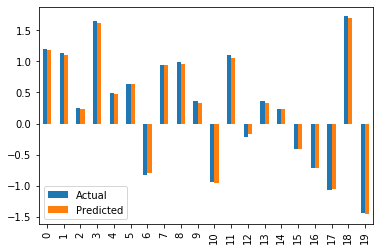

In [33]:
graph.plot(kind='bar');

In [34]:
accuracy = regressor.score(x_test, y_test)
print("Linear Regression Accuracy : ", accuracy)

Linear Regression Accuracy :  0.9993954461681671


## Lets get some never before seen data to see how well that holds 

In [35]:
X_test = preprocessing.scale(trainset[["Low"]].values)
y_test = preprocessing.scale(trainset[["Open"]].values)

In [36]:
X_test = preprocessing.scale(trainset[['Low']].values)

predicted = regressor.predict(X_test)

print(f'Mean Square Error: {np.mean(predicted)}')
print(f'Score: {regressor.score(X_test,y_test)}')

Mean Square Error: -0.00022907236302124073
Score: 0.9980505400790799


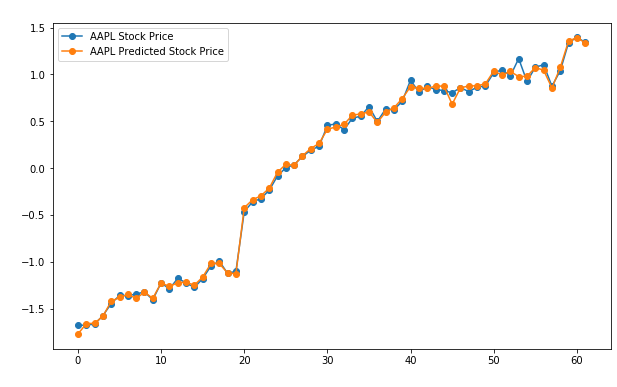

In [37]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label = 'AAPL Stock Price',marker='o')
plt.plot(predicted,label = 'AAPL Predicted Stock Price', marker='o')
plt.title('3 Month Stock Price Prediction',color="white")
plt.xlabel('Time (Days in test set)', color="white")
plt.ylabel('AAPL Stock Price', color="white")
plt.legend()
plt.show()